## Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import h5py, json
import math, random

## Dataset SYNOP

In [61]:
dataset_filename     = 'synop-LYS.csv'
description_filename = 'synop.json'
output_dir           = 'SYNOP'

In [30]:
data_filename   = 'origine/donnees-synop-essentielles-omm-LYS.csv'
schema_filename = 'origine/schema.json'

In [31]:
with open(f'{output_dir}/{schema_filename}','r') as json_file:
    schema = json.load(json_file)

synop_codes=list( schema['definitions']['donnees-synop-essentielles-omm_records']['properties']['fields']['properties'].keys() )

In [40]:
from IPython.display import display


df = pd.read_csv(f'{output_dir}/{data_filename}', header=0, sep=';')
print('Raw data :')
display(df.tail(10))

# Get the columns name as descriptions

synop_desc = list(df.columns)

# Set Codes as columns name

df.columns   = synop_codes
code2desc    = dict(zip(synop_codes, synop_desc))

# Count the na values by columns

columns_na = df.isna().sum().tolist()

# Show all of that

df_desc=pd.DataFrame({'Code':synop_codes, 'Description':synop_desc, 'Na':columns_na})

print('List of columns :')
display(df_desc)

print('Shape is : ', df.shape)

Raw data :


,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
29155,7481,2019-11-16T01:00:00+01:00,100640.0,130.0,1.0,190.0,1.0,272.75,272.75,100.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29156,7481,2019-11-16T19:00:00+01:00,101090.0,90.0,3.0,130.0,3.5,276.95,274.65,85.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29157,7481,2020-02-12T16:00:00+01:00,102460.0,-180.0,6.0,360.0,2.3,283.45,271.75,44.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29158,7481,2020-02-13T04:00:00+01:00,102100.0,-240.0,8.0,150.0,4.9,274.75,271.15,77.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29159,7481,2020-02-14T01:00:00+01:00,102080.0,230.0,1.0,280.0,4.5,283.15,276.15,62.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29160,7481,2020-02-14T07:00:00+01:00,102430.0,210.0,2.0,140.0,3.4,280.15,278.45,89.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29161,7481,2020-02-15T16:00:00+01:00,102190.0,-160.0,6.0,180.0,6.9,290.15,273.75,33.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29162,7481,2020-01-25T22:00:00+01:00,102030.0,20.0,1.0,140.0,4.9,281.45,278.55,82.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29163,7481,2020-01-26T19:00:00+01:00,102010.0,80.0,3.0,170.0,3.7,282.85,279.15,78.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
29164,7481,2020-02-08T19:00:00+01:00,102540.0,150.0,2.0,190.0,6.2,283.75,277.65,66.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84


List of columns :


,Code,Description,Na
0,numer_sta,ID OMM station,0
1,date,Date,0
2,pmer,Pression au niveau mer,17
3,tend,Variation de pression en 3 heures,2
4,cod_tend,Type de tendance barométrique,2
...,...,...,...
76,code_epci,EPCI (code),0
77,nom_dept,department (name),0
78,code_dep,department (code),0
79,nom_reg,region (name),0


Shape is :  (29165, 81)


In [45]:
columns_used=['date','pmer','tend','cod_tend','dd','ff','td','u','ww','pres','rafper','per','rr1','rr3','tc']

# Drop unused columns

to_drop = df.columns.difference(columns_used)
df.drop( to_drop, axis=1, inplace=True)

# Show all of that

print('Our selected columns :')
display(df.head(20))

Our selected columns :


,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,per,rr1,rr3,tc
0,2015-06-12T17:00:00+02:00,101050.0,-230.0,6.0,140.0,3.6,286.25,50.0,2.0,98330.0,5.1,-10.0,0.0,-0.1,24.2
1,2015-06-05T17:00:00+02:00,101590.0,-220.0,8.0,190.0,3.9,286.95,32.0,3.0,98930.0,9.9,-10.0,0.0,0.0,32.6
2,2015-06-15T11:00:00+02:00,101420.0,90.0,1.0,270.0,1.5,286.85,64.0,3.0,98660.0,4.5,-10.0,0.0,0.0,20.8
3,2015-06-15T14:00:00+02:00,101430.0,20.0,1.0,10.0,2.5,286.45,55.0,1.0,98680.0,5.1,-10.0,0.0,0.0,22.8
4,2015-06-20T05:00:00+02:00,102030.0,0.0,4.0,50.0,0.7,282.95,82.0,2.0,99170.0,2.4,-10.0,0.0,0.0,12.8
5,2015-06-22T05:00:00+02:00,101680.0,-120.0,6.0,180.0,0.7,286.15,80.0,1.0,98870.0,4.7,-10.0,0.0,-0.1,16.5
6,2015-06-23T02:00:00+02:00,101270.0,150.0,2.0,20.0,4.5,282.95,54.0,0.0,98490.0,10.2,-10.0,0.0,0.0,19.3
7,2015-06-25T14:00:00+02:00,102180.0,-40.0,8.0,10.0,2.3,283.25,38.0,1.0,99430.0,7.5,-10.0,0.0,0.0,25.5
8,2015-07-05T20:00:00+02:00,101410.0,50.0,3.0,190.0,8.3,288.05,33.0,3.0,98760.0,13.4,-10.0,0.0,0.0,33.4
9,2015-05-14T17:00:00+02:00,101070.0,-150.0,6.0,20.0,6.2,284.95,60.0,3.0,98300.0,11.1,-10.0,0.0,0.0,19.8


In [46]:
print('Few statistics :')
display(df.describe().style.format('{:.2f}'))

# 'per' column is constant, we can drop it

df.drop(['per'],axis=1,inplace=True)

# Count the na values by columns

dataset_na    = df.isna().sum().tolist()
dataset_cols  = df.columns.tolist()
dataset_desc  = [ code2desc[c] for c in dataset_cols ]

# Show all of that

df_desc=pd.DataFrame({'Columns':dataset_cols, 'Description':dataset_desc, 'Na':dataset_na})
display(df_desc.style.set_properties(**{'text-align': 'left'}))

Few statistics :


,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,per,rr1,rr3,tc
count,29148.00,29163.00,29163.00,29162.00,29163.00,29148.00,29148.00,29164.00,29165.00,29156.00,29157.00,29070.00,29092.00,29151.00
mean,101753.55,0.26,4.31,204.09,3.40,280.03,71.02,10.11,98894.60,6.30,-10.00,0.09,0.28,12.69
std,798.09,111.44,2.72,115.42,2.47,5.86,18.28,19.40,761.59,3.85,0.00,0.61,1.41,8.15
min,97960.00,-750.00,0.00,0.00,0.00,249.25,2.00,0.00,95170.00,0.00,-10.00,-0.10,-0.10,-12.10
25%,101300.00,-70.00,2.00,130.00,1.50,275.83,58.00,2.00,98480.00,3.60,-10.00,0.00,0.00,6.60
50%,101740.00,0.00,3.00,190.00,2.90,280.25,74.00,2.00,98920.00,5.30,-10.00,0.00,0.00,12.50
75%,102240.00,70.00,7.00,330.00,4.60,284.55,86.00,3.00,99360.00,8.20,-10.00,0.00,0.00,18.50
max,104280.00,810.00,8.00,360.00,18.80,295.95,100.00,97.00,101210.00,30.20,-10.00,19.00,45.00,38.90


,Columns,Description,Na
0,date,Date,0
1,pmer,Pression au niveau mer,17
2,tend,Variation de pression en 3 heures,2
3,cod_tend,Type de tendance barométrique,2
4,dd,Direction du vent moyen 10 mn,3
5,ff,Vitesse du vent moyen 10 mn,2
6,td,Point de rosée,17
7,u,Humidité,17
8,ww,Temps présent,1
9,pres,Pression station,0


In [49]:
# First of all, we have to sort on the date

df.sort_values(['date'],  inplace=True)
df.reset_index(drop=True, inplace=True)

# Before : Lines with NaN

na_rows=df.isna().any(axis=1)

display( df[na_rows].head(10) )

# Nice interpolation for plugging holes

df.interpolate(inplace=True)

# After

display(df[na_rows].head(10))


,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,rr1,rr3,tc
396,2010-02-19T16:00:00+01:00,99760.0,180.0,3.0,330.0,4.6,275.85,79.0,21.0,96890.0,NaN,0.0,1.0,6.1
434,2010-02-24T10:00:00+01:00,100310.0,60.0,1.0,NaN,NaN,279.25,77.0,2.0,97470.0,NaN,0.2,0.2,9.9
477,2010-03-01T19:00:00+01:00,101400.0,NaN,NaN,340.0,2.6,275.45,61.0,2.0,98520.0,5.7,0.0,NaN,9.4
734,2010-04-03T02:00:00+02:00,101550.0,50.0,0.0,190.0,7.7,277.55,64.0,2.0,98680.0,12.3,NaN,NaN,10.9
1061,2010-05-13T23:00:00+02:00,NaN,60.0,2.0,330.0,4.6,NaN,NaN,2.0,98220.0,7.7,0.0,0.0,9.9
1063,2010-05-14T05:00:00+02:00,NaN,-50.0,5.0,350.0,4.1,NaN,NaN,2.0,98110.0,7.2,0.0,0.0,8.1
1064,2010-05-14T08:00:00+02:00,NaN,0.0,5.0,350.0,4.6,NaN,NaN,2.0,98110.0,6.7,0.0,0.0,8.1
2268,2010-10-11T20:00:00+02:00,NaN,150.0,2.0,10.0,1.0,NaN,NaN,2.0,98060.0,3.1,NaN,NaN,NaN
2269,2010-10-11T23:00:00+02:00,NaN,130.0,3.0,80.0,1.0,NaN,NaN,2.0,98190.0,2.6,NaN,NaN,NaN
2270,2010-10-12T02:00:00+02:00,NaN,70.0,1.0,0.0,0.0,NaN,NaN,2.0,98260.0,1.5,NaN,NaN,NaN


,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,rr1,rr3,tc
396,2010-02-19T16:00:00+01:00,99760.000000,180.0,3.0,330.0,4.60,275.85,79.000000,21.0,96890.0,8.25,0.0,1.0,6.10
434,2010-02-24T10:00:00+01:00,100310.000000,60.0,1.0,170.0,4.15,279.25,77.000000,2.0,97470.0,6.65,0.2,0.2,9.90
477,2010-03-01T19:00:00+01:00,101400.000000,195.0,4.0,340.0,2.60,275.45,61.000000,2.0,98520.0,5.70,0.0,0.5,9.40
734,2010-04-03T02:00:00+02:00,101550.000000,50.0,0.0,190.0,7.70,277.55,64.000000,2.0,98680.0,12.30,0.0,0.0,10.90
1061,2010-05-13T23:00:00+02:00,101020.000000,60.0,2.0,330.0,4.60,281.25,86.500000,2.0,98220.0,7.70,0.0,0.0,9.90
1063,2010-05-14T05:00:00+02:00,101040.000000,-50.0,5.0,350.0,4.10,279.15,80.666667,2.0,98110.0,7.20,0.0,0.0,8.10
1064,2010-05-14T08:00:00+02:00,101040.000000,0.0,5.0,350.0,4.60,279.35,79.333333,2.0,98110.0,6.70,0.0,0.0,8.10
2268,2010-10-11T20:00:00+02:00,100786.666667,150.0,2.0,10.0,1.00,284.75,83.333333,2.0,98060.0,3.10,0.0,0.0,14.45
2269,2010-10-11T23:00:00+02:00,100863.333333,130.0,3.0,80.0,1.00,284.45,84.666667,2.0,98190.0,2.60,0.0,0.0,13.90
2270,2010-10-12T02:00:00+02:00,100940.000000,70.0,1.0,0.0,0.00,284.15,86.000000,2.0,98260.0,1.50,0.0,0.0,13.35


In [52]:
# Count the na values by columns

dataset_na    = df.isna().sum().tolist()
dataset_cols  = df.columns.tolist()
dataset_desc  = [ code2desc[c] for c in dataset_cols ]

# Show all of that

df_desc=pd.DataFrame({'Columns':dataset_cols, 'Description':dataset_desc, 'Na':dataset_na})

display(df_desc.style.set_properties(**{'text-align': 'left'}))

display(df.tail(20))
print('Shape is : ', df.shape)

,Columns,Description,Na
0,date,Date,0
1,pmer,Pression au niveau mer,0
2,tend,Variation de pression en 3 heures,0
3,cod_tend,Type de tendance barométrique,0
4,dd,Direction du vent moyen 10 mn,0
5,ff,Vitesse du vent moyen 10 mn,0
6,td,Point de rosée,0
7,u,Humidité,0
8,ww,Temps présent,0
9,pres,Pression station,0


,date,pmer,tend,cod_tend,dd,ff,td,u,ww,pres,rafper,rr1,rr3,tc
29145,2020-02-24T13:00:00+01:00,102380.0,-220.0,8.0,120.0,1.6,281.15,59.0,0.0,99540.0,3.7,0.0,0.0,16.0
29146,2020-02-24T16:00:00+01:00,101990.0,-350.0,6.0,110.0,1.6,281.55,50.0,3.0,99190.0,3.3,0.0,0.0,19.1
29147,2020-02-24T19:00:00+01:00,101800.0,-220.0,6.0,150.0,2.9,280.05,55.0,3.0,98970.0,4.1,0.0,0.0,15.9
29148,2020-02-24T22:00:00+01:00,101740.0,-80.0,6.0,170.0,1.8,280.35,67.0,2.0,98890.0,4.3,0.0,0.0,13.2
29149,2020-02-25T01:00:00+01:00,101640.0,-150.0,8.0,170.0,2.5,278.85,83.0,2.0,98740.0,4.7,0.0,0.0,8.4
29150,2020-02-25T04:00:00+01:00,101450.0,-200.0,6.0,150.0,3.7,277.75,87.0,2.0,98540.0,4.8,0.0,0.0,6.6
29151,2020-02-25T07:00:00+01:00,101530.0,60.0,3.0,30.0,4.0,276.95,92.0,3.0,98600.0,6.1,0.0,0.0,5.0
29152,2020-02-25T10:00:00+01:00,101490.0,-20.0,8.0,200.0,1.8,277.55,87.0,3.0,98580.0,5.5,0.0,0.0,6.4
29153,2020-02-25T13:00:00+01:00,101330.0,-140.0,8.0,150.0,3.8,278.95,85.0,21.0,98440.0,7.1,0.6,2.0,8.2
29154,2020-02-25T16:00:00+01:00,100990.0,-290.0,6.0,140.0,4.4,279.55,69.0,3.0,98150.0,7.2,0.0,0.0,11.9


Shape is :  (29165, 14)


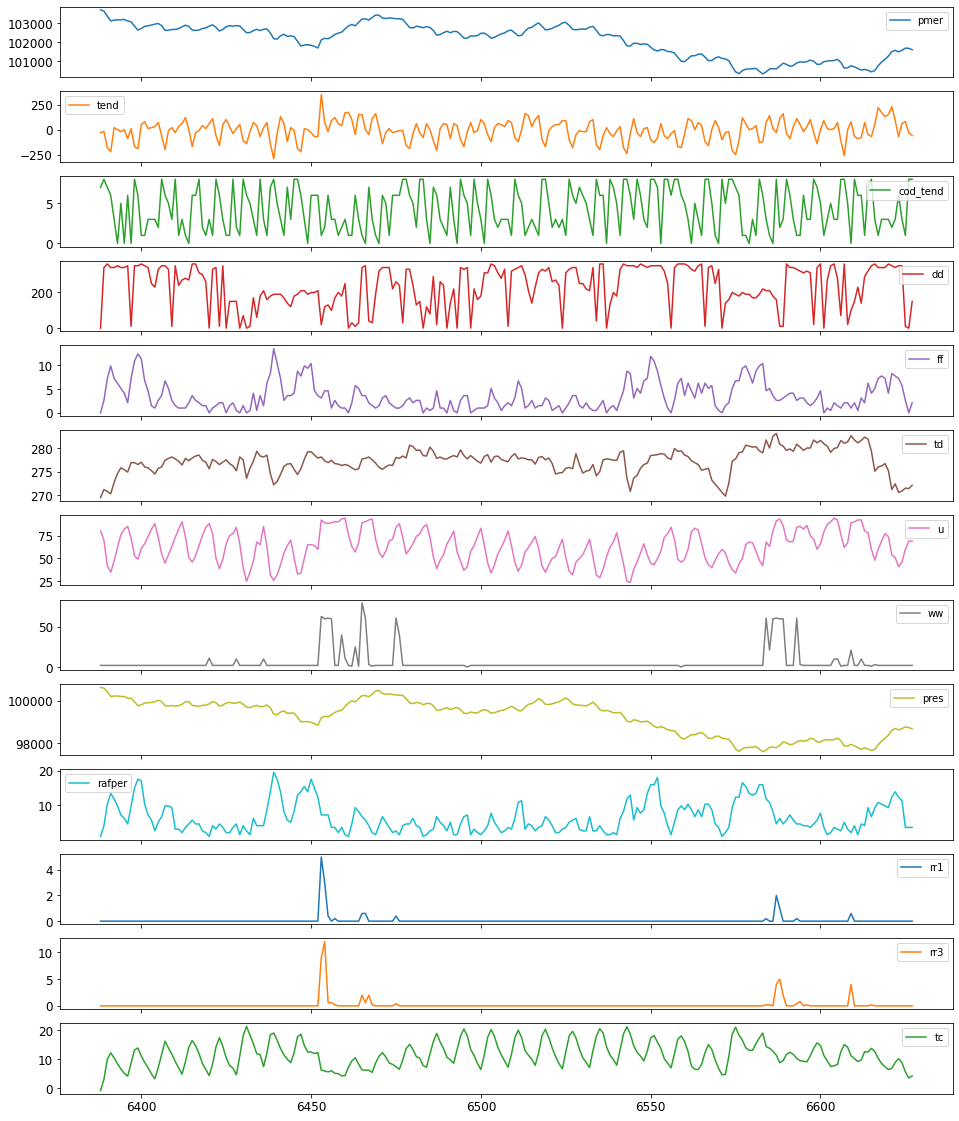

In [54]:
i=random.randint(0,len(df)-240)
df.iloc[i:i+240].plot(subplots=True, fontsize=12, figsize=(16,20))
plt.show()

In [62]:
#  Save it

data_dir='SYNOP/origine/data'
os.makedirs(data_dir, mode=0o750, exist_ok=True)

filedata = f'{data_dir}/{dataset_filename}'
filedesc = f'{data_dir}/{description_filename}'

df.to_csv(filedata, sep=';', index=False)
size=os.path.getsize(filedata)/(1024*1024)
print(f'Dataset saved. ({size:0.1f} Mo)')

with open(filedesc, 'w', encoding='utf-8') as f:
    json.dump(code2desc, f, indent=4)
print('Synop description saved.')
    

Dataset saved. (3.0 Mo)
Synop description saved.
